<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Training_Perceptron_with_rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Perceptron with Perceptron Learning Rule

Step 1: Initialize Variables and Environment

In [1]:
import torch

# Set random seed for reproducibility
torch.manual_seed(42)

# Synthetic linear dataset with more data points
X = torch.tensor([
    [0.5, 1.5], [1.0, 2.0], [1.5, 2.5],  # Original points
    [0.2, 1.0], [0.7, 1.8], [1.2, 2.2],  # More points for the first class (or border)
    [2.0, 3.0], [2.5, 3.5], [3.0, 4.0],  # Points clearly for the second class
    [0.8, 1.3], [1.3, 1.7], [2.2, 3.2]   # Additional mixed/borderline points
], dtype=torch.float32)

y = torch.tensor([
    0, 1, 1,
    0, 0, 1,
    1, 1, 1,
    0, 0, 1
], dtype=torch.float32)

print("Input data (X):")
print(X)
print("\nLabels (y):")
print(y)

Input data (X):
tensor([[0.5000, 1.5000],
        [1.0000, 2.0000],
        [1.5000, 2.5000],
        [0.2000, 1.0000],
        [0.7000, 1.8000],
        [1.2000, 2.2000],
        [2.0000, 3.0000],
        [2.5000, 3.5000],
        [3.0000, 4.0000],
        [0.8000, 1.3000],
        [1.3000, 1.7000],
        [2.2000, 3.2000]])

Labels (y):
tensor([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.])


Step 2: Implementing the Perceptron Class with the Perceptron Learning Rule

In [2]:
import torch

class Perceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        # Initialize weights to zeros as float32
        self.weights = torch.zeros(input_dim, dtype=torch.float32, requires_grad=False)
        self.learning_rate = learning_rate

        # History tracking for visualization
        self.weights_history = []
        self.epoch_loss_history = []

    def forward(self, x):
        # Weighted sum: dot product of weights and input
        return torch.dot(self.weights, x)

    def predict(self, x):
        # Sigmoid activation to interpret output as probability
        return torch.sigmoid(self.forward(x))

    def update_weights(self, x, error):
        # Perceptron Learning Rule: w = w + (lr * error * x)
        self.weights += self.learning_rate * error * x

    def train(self, X_train, y_train, epochs=10):
        """
        Trains the perceptron model iterating through epochs.
        """
        print(f"Initial weights: {self.weights.numpy()}")
        self.weights_history.append(self.weights.clone())
        self.epoch_loss_history.append(0)

        for epoch in range(epochs):
            epoch_total_loss = 0.0
            num_samples = X_train.size(0)

            for i in range(num_samples):
                x_sample = X_train[i]
                y_target = y_train[i]

                # Make a prediction and calculate error
                prediction = self.predict(x_sample)
                error = y_target - prediction

                # Update weights manually
                self.update_weights(x_sample, error)

                # Use squared error for observation tracking
                epoch_total_loss += error.item() ** 2

            # Store average loss for the epoch
            average_epoch_loss = epoch_total_loss / num_samples
            self.weights_history.append(self.weights.clone())
            self.epoch_loss_history.append(average_epoch_loss)

            print(f"Epoch {epoch+1}/{epochs}: Weights = {self.weights.numpy()}, Avg Sample Loss = {average_epoch_loss:.4f}")

#Execution

# 1. Initialize Data (from Step 1)
X = torch.tensor([
    [0.5, 1.5], [1.0, 2.0], [1.5, 2.5], [0.2, 1.0], [0.7, 1.8], [1.2, 2.2],
    [2.0, 3.0], [2.5, 3.5], [3.0, 4.0], [0.8, 1.3], [1.3, 1.7], [2.2, 3.2]
], dtype=torch.float32)

y = torch.tensor([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=torch.float32)

# 2. Initialize and Train Model
model = Perceptron(input_dim=X.shape[1])
model.train(X, y, epochs=10)

# 3. Evaluate the model (Step 4)
with torch.no_grad():
    final_preds = torch.tensor([model.predict(x) for x in X])
    binary_preds = (final_preds >= 0.5).float()
    accuracy = (binary_preds == y).float().mean()

print(f"\nFinal Accuracy: {accuracy.item():.4f}")

# 4. Test with specific manual inputs
print("\nTesting manual inputs:")
test_points = torch.tensor([[0.5, 1.0], [3.5, 4.0]], dtype=torch.float32)

for point in test_points:
    prob = model.predict(point)
    label = 1 if prob >= 0.5 else 0
    print(f"Input: {point.numpy()} -> Class: {label} (Prob: {prob:.4f})")

Initial weights: [0. 0.]
Epoch 1/10: Weights = [0.0443448  0.05823863], Avg Sample Loss = 0.2428
Epoch 2/10: Weights = [0.07956587 0.10239312], Avg Sample Loss = 0.2251
Epoch 3/10: Weights = [0.10802493 0.13608053], Avg Sample Loss = 0.2151
Epoch 4/10: Weights = [0.13144681 0.16194844], Avg Sample Loss = 0.2095
Epoch 5/10: Weights = [0.15106703 0.18189989], Avg Sample Loss = 0.2063
Epoch 6/10: Weights = [0.16777521 0.19731002], Avg Sample Loss = 0.2044
Epoch 7/10: Weights = [0.1822211  0.20918679], Avg Sample Loss = 0.2034
Epoch 8/10: Weights = [0.19488722 0.21828125], Avg Sample Loss = 0.2029
Epoch 9/10: Weights = [0.20613797 0.2251623 ], Avg Sample Loss = 0.2026
Epoch 10/10: Weights = [0.21625274 0.23026724], Avg Sample Loss = 0.2024

Final Accuracy: 0.5833

Testing manual inputs:
Input: [0.5 1. ] -> Class: 1 (Prob: 0.5838)
Input: [3.5 4. ] -> Class: 1 (Prob: 0.8426)


Step 3. Training the Perceptron and Visualizing training progress

Initial weights: [0. 0.]
Epoch 1/30: Weights = [0.20759994 0.2472634 ], Avg Sample Loss = 0.2344
Epoch 2/30: Weights = [0.27219766 0.24924435], Avg Sample Loss = 0.2203
Epoch 3/30: Weights = [0.32017413 0.22413212], Avg Sample Loss = 0.2192
Epoch 4/30: Weights = [0.36509264 0.19532365], Avg Sample Loss = 0.2180
Epoch 5/30: Weights = [0.4089883  0.16631305], Avg Sample Loss = 0.2169
Epoch 6/30: Weights = [0.45219004 0.13764685], Avg Sample Loss = 0.2157
Epoch 7/30: Weights = [0.49475822 0.10940696], Avg Sample Loss = 0.2146
Epoch 8/30: Weights = [0.5367097  0.08160086], Avg Sample Loss = 0.2135
Epoch 9/30: Weights = [0.5780549  0.05422401], Avg Sample Loss = 0.2125
Epoch 10/30: Weights = [0.6188027  0.02726985], Avg Sample Loss = 0.2114
Epoch 11/30: Weights = [0.6589618  0.00073165], Avg Sample Loss = 0.2104
Epoch 12/30: Weights = [ 0.6985407  -0.02539738], Avg Sample Loss = 0.2095
Epoch 13/30: Weights = [ 0.73754823 -0.05112387], Avg Sample Loss = 0.2085
Epoch 14/30: Weights = [ 0.7759

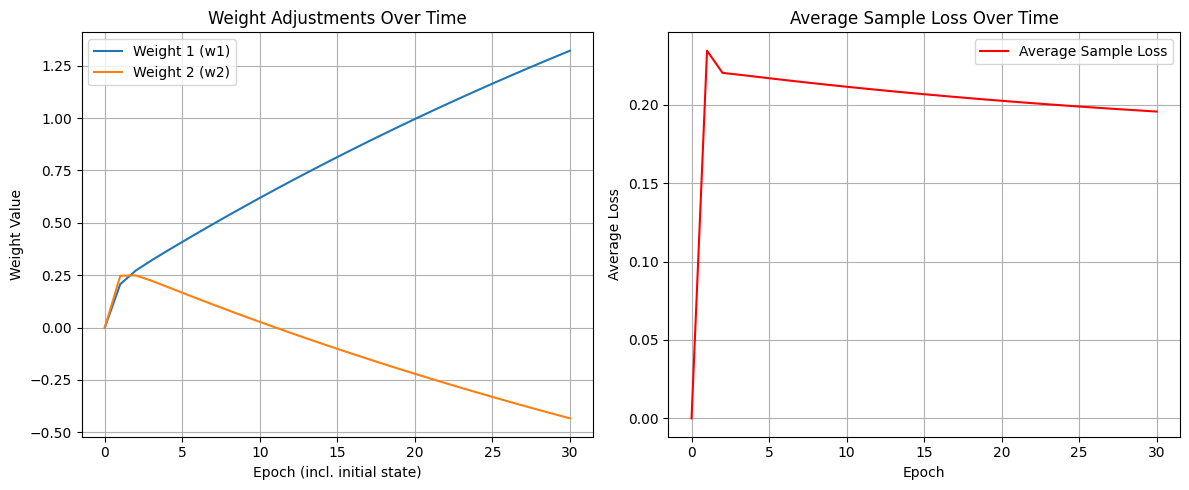


Final weights after training:
[ 1.3211825  -0.43301466]


In [3]:
import torch
import matplotlib.pyplot as plt

# --- A. Initialize Data (from Step 1) ---
torch.manual_seed(42)
X = torch.tensor([
    [0.5, 1.5], [1.0, 2.0], [1.5, 2.5],
    [0.2, 1.0], [0.7, 1.8], [1.2, 2.2],
    [2.0, 3.0], [2.5, 3.5], [3.0, 4.0],
    [0.8, 1.3], [1.3, 1.7], [2.2, 3.2]
], dtype=torch.float32)

y = torch.tensor([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=torch.float32)

# --- B. Execute Training (the heart of Step 3) ---
# Create the instance with the defined input dimensions
perceptron = Perceptron(input_dim=X.size(1), learning_rate=0.1)

# Run the training loop for 30 epochs
num_epochs = 30
perceptron.train(X, y, epochs=num_epochs)

# --- C. Visualize Progress (Plotting weight and loss trends) ---
plt.figure(figsize=(12, 5))

# 1. Plot weight adjustments over time
plt.subplot(1, 2, 1)
num_epochs_plot = len(perceptron.weights_history)
epochs_range = range(num_epochs_plot)

plt.plot(epochs_range, [wh[0].item() for wh in perceptron.weights_history], label='Weight 1 (w1)')
plt.plot(epochs_range, [wh[1].item() for wh in perceptron.weights_history], label='Weight 2 (w2)')

plt.title('Weight Adjustments Over Time')
plt.xlabel('Epoch (incl. initial state)')
plt.ylabel('Weight Value')
plt.legend()
plt.grid(True)

# 2. Plot average sample loss over time
plt.subplot(1, 2, 2)
plt.plot(epochs_range, perceptron.epoch_loss_history, label='Average Sample Loss', color='red')
plt.title('Average Sample Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal weights after training:")
print(perceptron.weights.numpy())